In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)

In [2]:
WORKING_DIR = '.'

# Load data

In [3]:
try:
    df = pd.read_excel(f'{WORKING_DIR}/labeled_data.xlsx')
    test_df = pd.read_excel(f'{WORKING_DIR}/unlabeled_data.xlsx')
except FileNotFoundError:
    print("Make sure 'labeled_data.xlsx' and 'unlabeled_data.xlsx' are in the same directory as this notebook.")

# Preprocessing / cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37636 entries, 0 to 37635
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ID                 37636 non-null  int64         
 1   Maker              37636 non-null  object        
 2   Genmodel           37636 non-null  object        
 3   Genmodel_ID        37636 non-null  object        
 4   Adv_year           37636 non-null  int64         
 5   Adv_month          37636 non-null  int64         
 6   Color              37636 non-null  object        
 7   Reg_year           37636 non-null  int64         
 8   Bodytype           37636 non-null  object        
 9   Runned_Miles       37636 non-null  int64         
 10  Engin_size         37636 non-null  object        
 11  Gearbox            37636 non-null  object        
 12  Fuel_type          37636 non-null  object        
 13  Price              37636 non-null  int64         
 14  Seat_n

In [5]:
df.rename(columns={' Genmodel': 'Genmodel', ' Genmodel_ID': 'Genmodel_ID'}, inplace=True)

In [6]:
df.head()

,ID,Maker,Genmodel,Genmodel_ID,Adv_year,Adv_month,Color,Reg_year,Bodytype,Runned_Miles,Engin_size,Gearbox,Fuel_type,Price,Seat_num,Door_num,issue,issue_id,Adv_day,breakdown_date,repair_complexity,repair_cost,repair_hours,repair_date,value,Label
0,11224,Chevrolet,Matiz,16_12,2018,8,Silver,2008,Hatchback,61200,1.0L,Manual,Petrol,699,5,5,Excessive Emissions,0,7,2018-08-07,1,20.6291,1.0,2018-08-07,664.756621,0
1,13673,Ford,Kuga,29_25,2018,5,White,2015,SUV,36579,2.0L,Manual,Diesel,12191,5,5,Radiator Leaking,0,9,2018-05-09,1,283.8200,2.0,2018-05-09,11581.844041,0
2,9528,Ford,Fiesta,29_13,2018,7,Red,2010,Hatchback,71000,1.25L,Manual,Petrol,2600,5,3,Engine Issue,3,14,2018-07-14,1,500.0000,12.0,2018-07-17,2469.094896,0
3,40424,DS,3,21_1,2018,3,Black,2017,Hatchback,6449,1.2L,Manual,Petrol,13458,5,3,Flat Tyres,0,25,2018-03-25,2,44.0374,2.0,2018-03-25,12785.925744,0
4,10711,Ford,S-Max,29_31,2018,5,White,2014,MPV,63751,2.0L,Automatic,still_Diesel_but_you_found_an_easteregg,11799,7,5,Windscreen Crack,0,14,2018-05-14,1,27.0794,1.0,2018-05-14,11203.607999,0


In [7]:
df['Adv_year'].unique()

array([2018, 2017, 2021,  202, 2019, 2016, 2015, 2014, 2013, 2012])

In [8]:
df.loc[df['Adv_year'] == 202] = 2020
df['Adv_year'].unique()

/var/folders/bb/qs4x3nv10ngd1v08rx8bb2l80000gn/T/ipykernel_41412/1593696173.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2020' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  df.loc[df['Adv_year'] == 202] = 2020
/var/folders/bb/qs4x3nv10ngd1v08rx8bb2l80000gn/T/ipykernel_41412/1593696173.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2020' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  df.loc[df['Adv_year'] == 202] = 2020


array([2018, 2017, 2021, 2020, 2019, 2016, 2015, 2014, 2013, 2012])

In [9]:
df['Adv_month'].unique()
df[df['Adv_month'].isin([13, 2020])]

,ID,Maker,Genmodel,Genmodel_ID,Adv_year,Adv_month,Color,Reg_year,Bodytype,Runned_Miles,Engin_size,Gearbox,Fuel_type,Price,Seat_num,Door_num,issue,issue_id,Adv_day,breakdown_date,repair_complexity,repair_cost,repair_hours,repair_date,value,Label
287,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020.0,2020.0,2020,2020.0,2020
336,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020.0,2020.0,2020,2020.0,2020
357,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020.0,2020.0,2020,2020.0,2020
420,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020.0,2020.0,2020,2020.0,2020
465,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020.0,2020.0,2020,2020.0,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36579,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020.0,2020.0,2020,2020.0,2020
36640,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020.0,2020.0,2020,2020.0,2020
36704,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020.0,2020.0,2020,2020.0,2020
37219,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020.0,2020.0,2020,2020.0,2020


In [10]:
df = df[df['Adv_month'] != 2020]
df.loc[df['Adv_month'] == 13, 'Adv_month'] = 12
df['Adv_month'].unique()

array([ 8,  5,  7,  3,  9,  6,  4,  1, 11, 10,  2, 12])

In [11]:
df['Color'].unique()

array(['Silver', 'White', 'Red', 'Black', 'Orange', 'Blue', 'Grey',
       'Green', 'Gelb', 'Purple', 'Yellow', 'Brown', 'Pink', 'Beige',
       'Bronze', 'Gold', 'Multicolour', 'Turquoise', 'Burgundy',
       'Magenta', 'Maroon', 'Indigo'], dtype=object)

In [12]:
df.loc[df['Color'] == 'Gelb', 'Color'] = 'Yellow'
df['Color'].unique()

array(['Silver', 'White', 'Red', 'Black', 'Orange', 'Blue', 'Grey',
       'Green', 'Yellow', 'Purple', 'Brown', 'Pink', 'Beige', 'Bronze',
       'Gold', 'Multicolour', 'Turquoise', 'Burgundy', 'Magenta',
       'Maroon', 'Indigo'], dtype=object)

# Train/validation split

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X = df.drop(columns=['ID', 'Label'], axis=1)
y = df['Label']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [15]:
len(X_train), len(X_val)

(29908, 7478)

# Identification and preprocessing of categorical and numerical features

In [16]:
categorical_features = X_train.select_dtypes(include=['object', 'int64']).columns
numerical_features = X_train.select_dtypes(include=['float64']).columns

In [17]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# 1) Better selectors
num_cols = X_train.select_dtypes(include=[np.number]).columns
cat_cols = X_train.select_dtypes(include=['object','category','bool']).columns

# 2) Make sure categorical columns are all strings
to_str = FunctionTransformer(lambda X: X.astype(str))

numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('to_str', to_str),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, num_cols),
        ('cat', categorical_transformer, cat_cols)
    ],
    remainder='drop'
)


In [18]:
preprocessor

,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,copy,True
,with_mean,True
,with_std,True


# Handle class imbalance

In [19]:
from imblearn.over_sampling import SMOTE
from collections import Counter
import seaborn as sns

Class distribution before handling imbalance: Counter({0: 26613, 1: 3295})


<Axes: xlabel='Label', ylabel='count'>

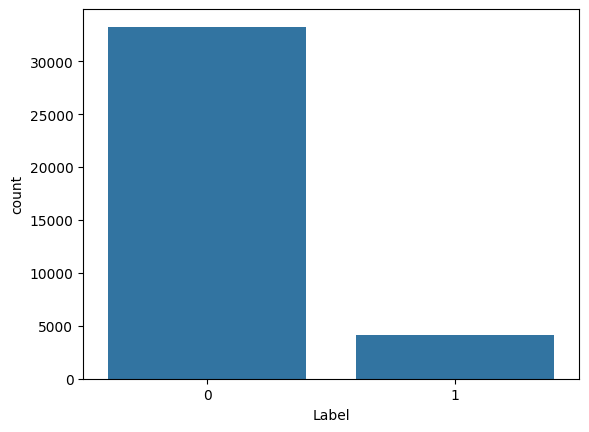

In [20]:
print("Class distribution before handling imbalance:", Counter(y_train))
sns.countplot(x = 'Label' , data = df)

Class distribution after SMOTE: Counter({1: 26613, 0: 26613})


<Axes: xlabel='Label', ylabel='count'>

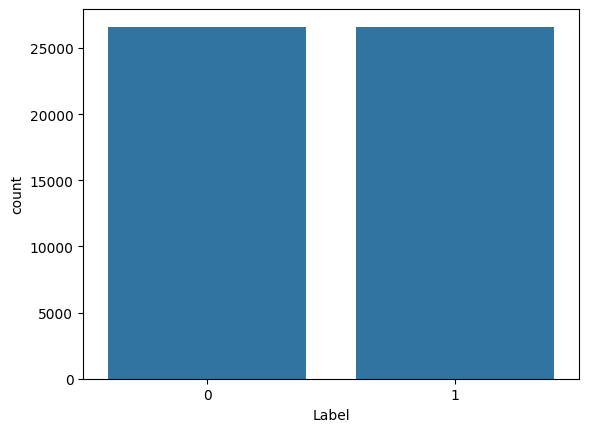

In [21]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(preprocessor.fit_transform(X_train), y_train)

print("Class distribution after SMOTE:", Counter(y_train_resampled))
sns.countplot(x = 'Label' , data = pd.DataFrame(y_train_resampled, columns=['Label']))

Class distribution after ADASYN: Counter({1: 27597, 0: 26613})


<Axes: xlabel='Label', ylabel='count'>

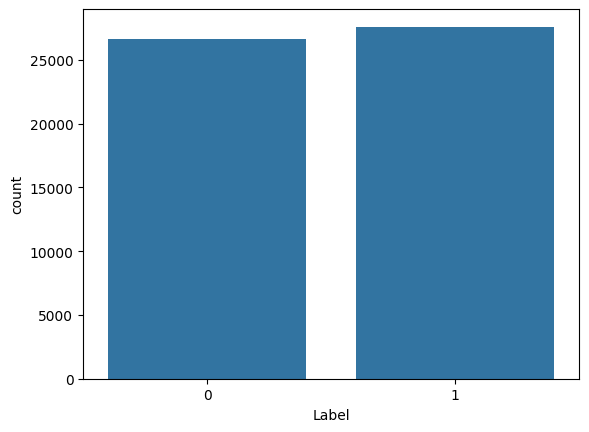

In [22]:
# try ADASYN instead of SMOTE
from imblearn.over_sampling import ADASYN
adasyn = ADASYN(random_state=42)
X_train_resampled, y_train_resampled = adasyn.fit_resample(preprocessor.fit_transform(X_train), y_train)

print("Class distribution after ADASYN:", Counter(y_train_resampled))
sns.countplot(x = 'Label' , data = pd.DataFrame(y_train_resampled, columns=['Label']))

Class distribution after KMeansSMOTE: Counter({1: 26615, 0: 26613})


<Axes: xlabel='Label', ylabel='count'>

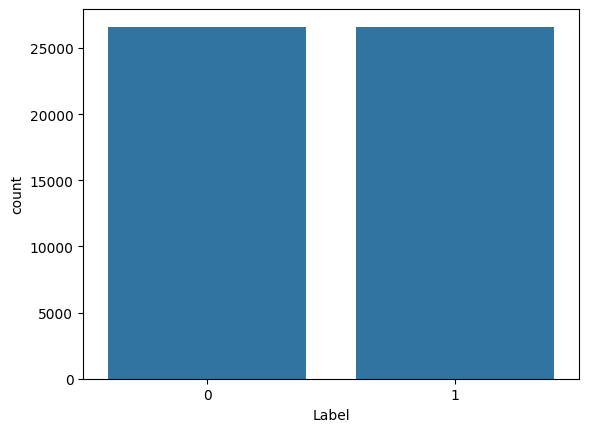

In [23]:
# try K-means SMOTE now
from imblearn.over_sampling import KMeansSMOTE
kmeans_smote = KMeansSMOTE(cluster_balance_threshold=0.1, random_state=4, sampling_strategy='auto')
X_train_resampled, y_train_resampled = kmeans_smote.fit_resample(preprocessor.fit_transform(X_train), y_train)

print("Class distribution after KMeansSMOTE:", Counter(y_train_resampled))
sns.countplot(x = 'Label' , data = pd.DataFrame(y_train_resampled, columns=['Label']))

# Define the model evaluation function

In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, auc
import matplotlib.pyplot as plt

In [25]:
def build_and_evaluate_model(model, X_train, y_train, X_test, y_test, model_name="Model", threshold=0.5):
    """
    Trains a given model, makes predictions on the training and test sets,
    and calculates and displays the confusion matrix, various evaluation metrics,
    and ROC/PR curves with AUC.  Allows setting a custom threshold.
    """
    model.fit(X_train, y_train)
    y_pred_train_proba = None
    y_pred_test_proba = None

    if hasattr(model, "predict_proba"):
        y_pred_proba_train = model.predict_proba(X_train)[:, 1]
        y_pred_proba_test = model.predict_proba(X_test)[:, 1]

    # Use threshold to make predictions
    y_pred_train = (y_pred_proba_train >= threshold).astype(int) if y_pred_proba_train is not None else model.predict(X_train_processed)
    y_pred_test = (y_pred_proba_test >= threshold).astype(int) if y_pred_proba_test is not None else model.predict(X_test_processed)

    print(f"--- {model_name} Evaluation (Threshold = {threshold:.2f})---")

    for name, y_true, y_pred, y_pred_proba in [("Training Set", y_train, y_pred_train, y_pred_proba_train),
                                                 ("Validation Set", y_test, y_pred_test, y_pred_proba_test)]:
        print(f"\n--- {name} ---")
        cm = confusion_matrix(y_true, y_pred)
        accuracy = accuracy_score(y_true, y_pred)
        precision = precision_score(y_true, y_pred)
        recall = recall_score(y_true, y_pred)
        f1 = f1_score(y_true, y_pred)

        TN, FP, FN, TP = cm.ravel()
        TPR = TP / (TP + FN) if (TP + FN) > 0 else 0
        FPR = FP / (FP + TN) if (FP + TN) > 0 else 0
        TNR = TN / (TN + FP) if (TN + FP) > 0 else 0
        FNR = FN / (FN + TP) if (FN + TP) > 0 else 0

        print("Confusion Matrix:\n", cm)
        print(f"Accuracy: {accuracy:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall (TPR or Sensitivity): {recall:.4f}")
        print(f"F1 Score: {f1:.4f}")
        print(f"TPR (True Positive Rate): {TPR:.4f}")
        print(f"FPR (False Positive Rate): {FPR:.4f}")
        print(f"TNR (True Negative Rate): {TNR:.4f}")
        print(f"FNR (False Negative Rate): {FNR:.4f}")

        if y_pred_proba is not None:
            # ROC Curve
            fpr, tpr, thresholds_roc = roc_curve(y_true, y_pred_proba)
            roc_auc = roc_auc_score(y_true, y_pred_proba)
            plt.figure(figsize=(8, 6))
            plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
            plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random classifier')
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.title(f'ROC Curve - {model_name} ({name})')
            plt.legend(loc='lower right')
            plt.show()

            # PR Curve
            precision_pr, recall_pr, thresholds_pr = precision_recall_curve(y_true, y_pred_proba)
            auc_pr = auc(recall_pr, precision_pr)
            plt.figure(figsize=(8, 6))
            plt.plot(recall_pr, precision_pr, color='blue', lw=2, label=f'PR curve (AUC = {auc_pr:.2f})')
            plt.plot([0, 1], [y_true.mean(), y_true.mean()], color='gray', lw=2, linestyle='--', label='Random classifier')
            plt.xlabel('Recall')
            plt.ylabel('Precision')
            plt.title(f'PR Curve - {model_name} ({name})')
            plt.legend(loc='upper right')
            plt.show()

    print("-" * 30)
    return model


In [26]:
X_val_processed = preprocessor.transform(X_val)

# Logistic Regression (No regularization)

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline


--- Logistic Regression (No regularization) Evaluation (Threshold = 0.50)---

--- Training Set ---
Confusion Matrix:
 [[23666  2947]
 [ 2484 24131]]
Accuracy: 0.8980
Precision: 0.8912
Recall (TPR or Sensitivity): 0.9067
F1 Score: 0.8989
TPR (True Positive Rate): 0.9067
FPR (False Positive Rate): 0.1107
TNR (True Negative Rate): 0.8893
FNR (False Negative Rate): 0.0933


/Users/wangshi/code/ReDi School/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


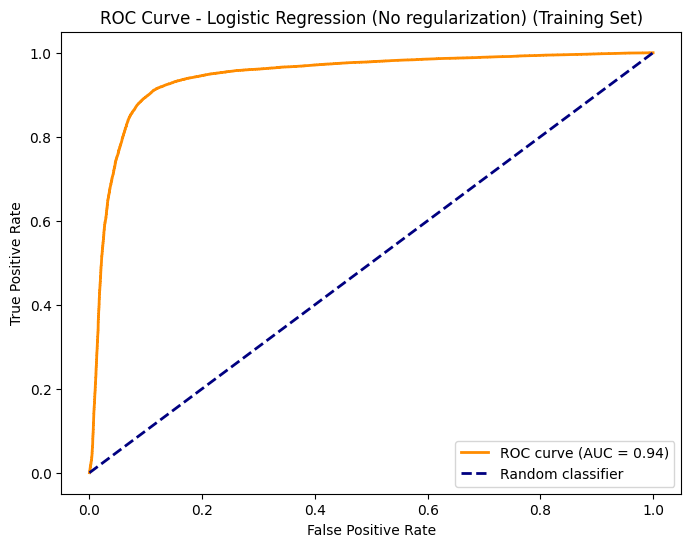

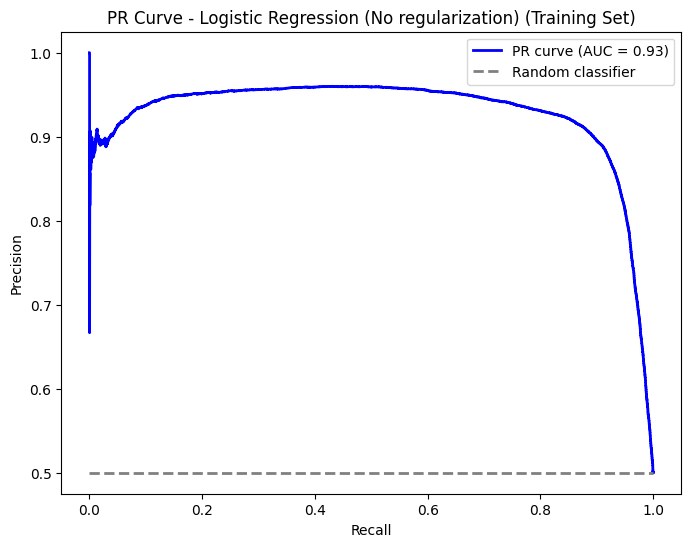


--- Validation Set ---
Confusion Matrix:
 [[5889  765]
 [ 367  457]]
Accuracy: 0.8486
Precision: 0.3740
Recall (TPR or Sensitivity): 0.5546
F1 Score: 0.4467
TPR (True Positive Rate): 0.5546
FPR (False Positive Rate): 0.1150
TNR (True Negative Rate): 0.8850
FNR (False Negative Rate): 0.4454


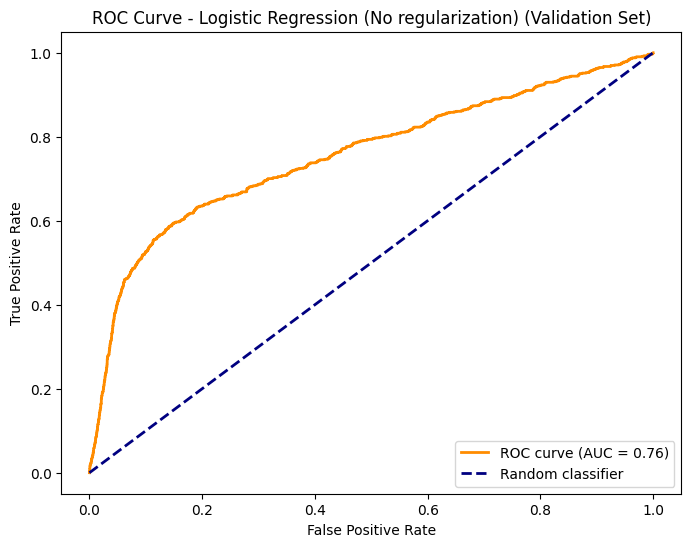

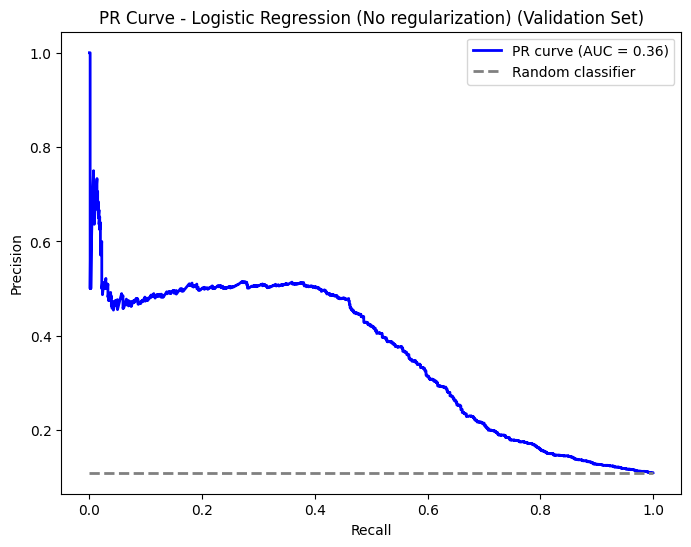

------------------------------


In [28]:
logistic_regression = Pipeline(steps=[('classifier', LogisticRegression(penalty=None, solver='lbfgs', random_state=42))])
logistic_regression_model = build_and_evaluate_model(logistic_regression, X_train_resampled, y_train_resampled, X_val_processed, y_val, "Logistic Regression (No regularization)")

# Logistic Regrression (with L2)

--- Logistic Regression (L2) Evaluation (Threshold = 0.50)---

--- Training Set ---
Confusion Matrix:
 [[23699  2914]
 [ 2611 24004]]
Accuracy: 0.8962
Precision: 0.8917
Recall (TPR or Sensitivity): 0.9019
F1 Score: 0.8968
TPR (True Positive Rate): 0.9019
FPR (False Positive Rate): 0.1095
TNR (True Negative Rate): 0.8905
FNR (False Negative Rate): 0.0981


/Users/wangshi/code/ReDi School/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


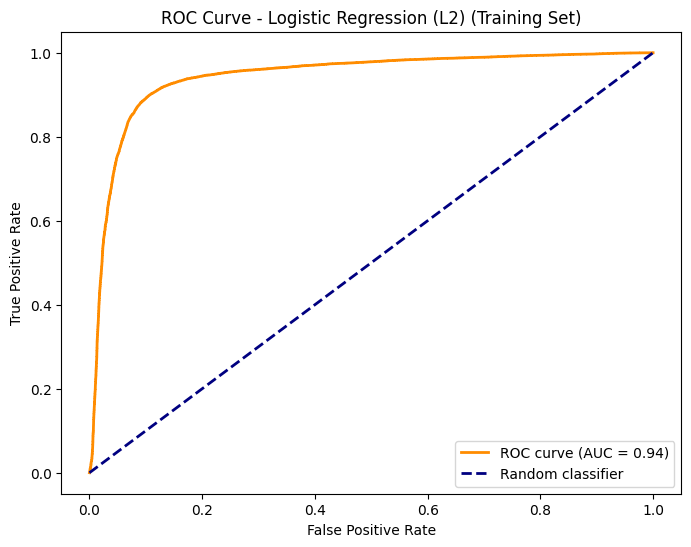

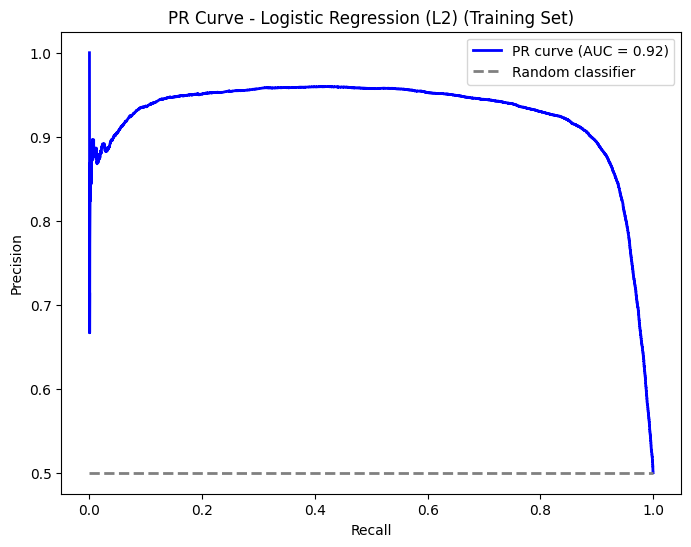


--- Validation Set ---
Confusion Matrix:
 [[5900  754]
 [ 367  457]]
Accuracy: 0.8501
Precision: 0.3774
Recall (TPR or Sensitivity): 0.5546
F1 Score: 0.4491
TPR (True Positive Rate): 0.5546
FPR (False Positive Rate): 0.1133
TNR (True Negative Rate): 0.8867
FNR (False Negative Rate): 0.4454


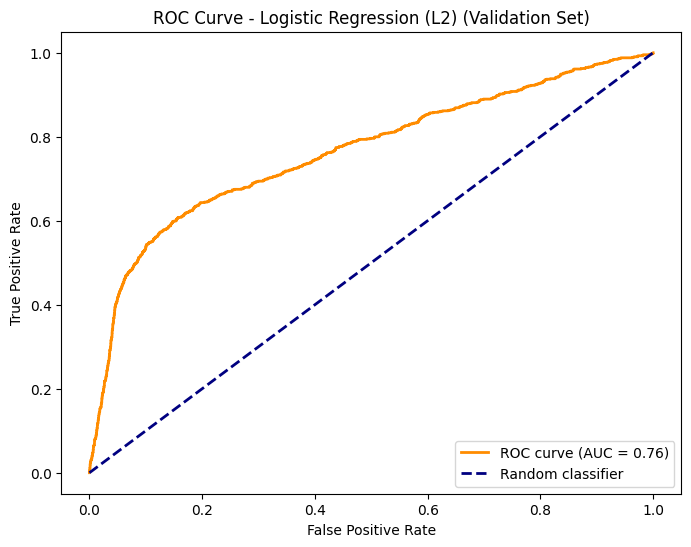

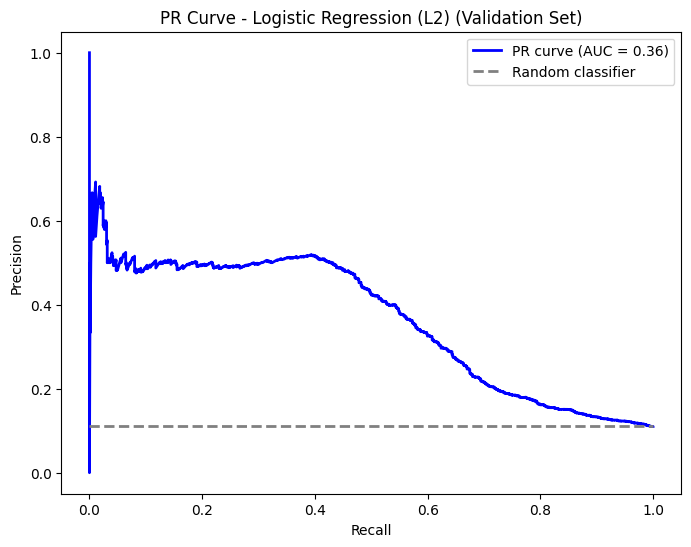

------------------------------


In [29]:
logistic_regression_l2 = Pipeline(steps=[('classifier', LogisticRegression(penalty='l2', solver='lbfgs', random_state=42, C=1.0))])
logistic_regression_l2_model = build_and_evaluate_model(logistic_regression_l2, X_train_resampled, y_train_resampled, X_val_processed, y_val, "Logistic Regression (L2)")


# Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier

--- Random Forest Evaluation (Threshold = 0.50)---

--- Training Set ---
Confusion Matrix:
 [[26582    31]
 [   62 26553]]
Accuracy: 0.9983
Precision: 0.9988
Recall (TPR or Sensitivity): 0.9977
F1 Score: 0.9983
TPR (True Positive Rate): 0.9977
FPR (False Positive Rate): 0.0012
TNR (True Negative Rate): 0.9988
FNR (False Negative Rate): 0.0023


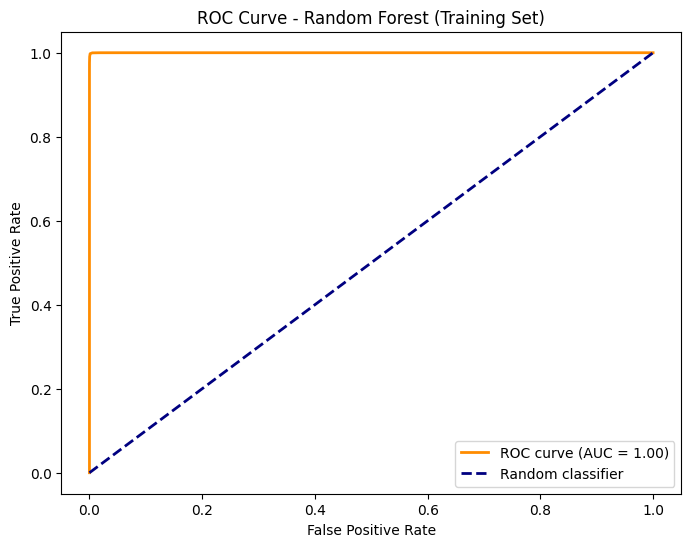

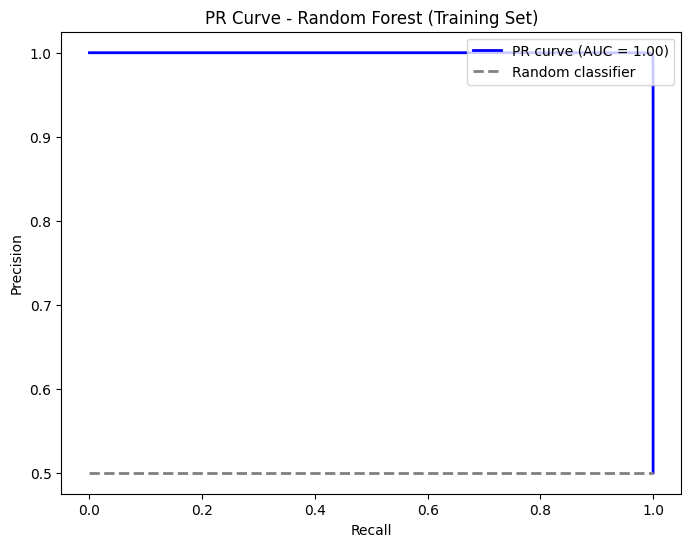


--- Validation Set ---
Confusion Matrix:
 [[6421  233]
 [ 582  242]]
Accuracy: 0.8910
Precision: 0.5095
Recall (TPR or Sensitivity): 0.2937
F1 Score: 0.3726
TPR (True Positive Rate): 0.2937
FPR (False Positive Rate): 0.0350
TNR (True Negative Rate): 0.9650
FNR (False Negative Rate): 0.7063


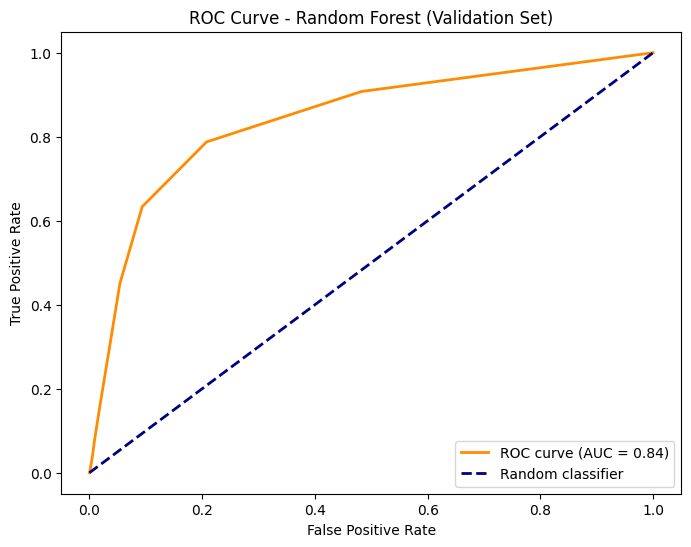

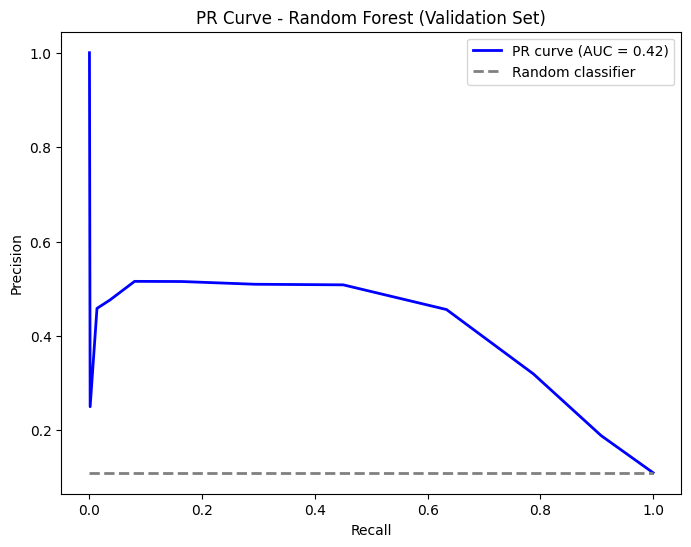

------------------------------


In [31]:
random_forest = Pipeline(steps=[('classifier', RandomForestClassifier(random_state=42, n_estimators=10))])
random_forest_model = build_and_evaluate_model(random_forest, X_train_resampled, y_train_resampled, X_val_processed, y_val, "Random Forest")


# Prediction on the Test Data (using the best model)

In [32]:
test_df.rename(columns={' Genmodel': 'Genmodel', ' Genmodel_ID': 'Genmodel_ID'}, inplace=True)

In [33]:
X_test_processed = preprocessor.transform(test_df)

test_predictions = random_forest_model.predict(X_test_processed)
prediction_df = pd.DataFrame({'ID': test_df['ID'], 'Label': test_predictions})
prediction_df.to_csv('prediction.csv', index=False)
print("\n'prediction.csv' has been created.")
prediction_df


'prediction.csv' has been created.


,ID,Label
0,29455,0
1,41446,0
2,42116,0
3,32619,0
4,51078,0
...,...,...
16125,16798,0
16126,34307,0
16127,13753,0
16128,46897,0


# Choose (e.g. Ridge, Lasso, KNeighborsRegressor, DecisionTreeRegressor, or RandomForestRegressor).

### Use to include preprocessing (e.g. StandardScaler) for fair comparison.

In [34]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [35]:
print(df.columns)

Index(['ID', 'Maker', 'Genmodel', 'Genmodel_ID', 'Adv_year', 'Adv_month',
       'Color', 'Reg_year', 'Bodytype', 'Runned_Miles', 'Engin_size',
       'Gearbox', 'Fuel_type', 'Price', 'Seat_num', 'Door_num', 'issue',
       'issue_id', 'Adv_day', 'breakdown_date', 'repair_complexity',
       'repair_cost', 'repair_hours', 'repair_date', 'value', 'Label'],
      dtype='object')


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37386 entries, 0 to 37635
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 37386 non-null  int64  
 1   Maker              37386 non-null  object 
 2   Genmodel           37386 non-null  object 
 3   Genmodel_ID        37386 non-null  object 
 4   Adv_year           37386 non-null  int64  
 5   Adv_month          37386 non-null  int64  
 6   Color              37386 non-null  object 
 7   Reg_year           37386 non-null  int64  
 8   Bodytype           37386 non-null  object 
 9   Runned_Miles       37386 non-null  int64  
 10  Engin_size         37386 non-null  object 
 11  Gearbox            37386 non-null  object 
 12  Fuel_type          37386 non-null  object 
 13  Price              37386 non-null  int64  
 14  Seat_num           37386 non-null  int64  
 15  Door_num           37386 non-null  int64  
 16  issue              37386 no

In [37]:
X = df.drop(columns=['Maker'])
y = df['Maker']

categorical_cols = X.select_dtypes(include=['object']).columns
numeric_cols = X.select_dtypes(exclude=['object']).columns

X[categorical_cols] = X[categorical_cols].astype(str)

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
])

log_reg = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(penalty='l1', solver='liblinear', random_state=42))
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

/Users/wangshi/code/ReDi School/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(


Accuracy: 0.9993313720246055

Classification Report:
              precision    recall  f1-score   support

      Abarth       1.00      1.00      1.00        63
     Bentley       1.00      1.00      1.00       148
    Cadillac       0.00      0.00      0.00         2
    Caterham       1.00      1.00      1.00         1
   Chevrolet       1.00      1.00      1.00       112
    Chrysler       0.98      1.00      0.99        61
     Citroen       1.00      1.00      1.00      1327
          DS       1.00      1.00      1.00       115
       Dacia       1.00      1.00      1.00       258
      Daewoo       1.00      1.00      1.00         2
    Daihatsu       1.00      1.00      1.00        15
       Dodge       0.95      0.95      0.95        20
     Ferrari       0.98      1.00      0.99        84
        Fiat       1.00      1.00      1.00       854
        Ford       1.00      1.00      1.00      3682
         GMC       1.00      1.00      1.00         1
  Great Wall       1.00     

/Users/wangshi/code/ReDi School/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/wangshi/code/ReDi School/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/wangshi/code/ReDi School/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"

In [43]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV

In [45]:
param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10]
}
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
grid_search = GridSearchCV(
    estimator=log_reg,
    param_grid=param_grid,
    cv=cv,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)
print("Best CV accuracy:", grid_search.best_score_)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


/Users/wangshi/code/ReDi School/.venv/lib/python3.13/site-packages/sklearn/model_selection/_split.py:811: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
/Users/wangshi/code/ReDi School/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(
/Users/wangshi/code/ReDi School/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  war

Best parameters: {'classifier__C': 10}
Best CV accuracy: 0.998963483555961


## Retrain the best model on the full training + validation data.

## Evaluate it on the (R² and RMSE).

## Compare the performance of all models you tested.

In [54]:
X_full_train = pd.concat([X_train, X_val], axis=0)
y_full_train = pd.concat([y_train, y_val], axis=0)

categorical_cols = X_full_train.select_dtypes(include=['object']).columns
X_full_train[categorical_cols] = X_full_train[categorical_cols].astype(str)

print(X_full_train[numeric_cols].dtypes)

ID                   float64
Adv_year               int64
Adv_month              int64
Reg_year               int64
Runned_Miles           int64
Price                  int64
Seat_num               int64
Door_num               int64
issue_id               int64
Adv_day                int64
repair_complexity      int64
repair_cost          float64
repair_hours         float64
value                float64
Label                float64
dtype: object


In [56]:
for col in numeric_cols:
    X_full_train[col] = pd.to_numeric(X_full_train[col], errors='coerce')
   
X_full_train[categorical_cols] = X_full_train[categorical_cols].astype(str)

In [57]:
from sklearn.impute import SimpleImputer

preprocessor = ColumnTransformer([
    ('num', Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ]), numeric_cols),
    ('cat', Pipeline([
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ('encoder', OneHotEncoder(handle_unknown='ignore'))
    ]), categorical_cols)
])

# Logistic Regression pipeline
best_model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(penalty='l1', solver='liblinear', random_state=42, max_iter=2000))
])

# Retrain on full training + validation data
best_model.fit(X_full_train, y_full_train)


TypeError: '<' not supported between instances of 'int' and 'str'